## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 로드

In [2]:
# pandas, numpy, matplotlib.pyplot 불러오기

# 네개의 파일을 붙여보는 것을 할 것이에요.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [3]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

<AxesSubplot:>

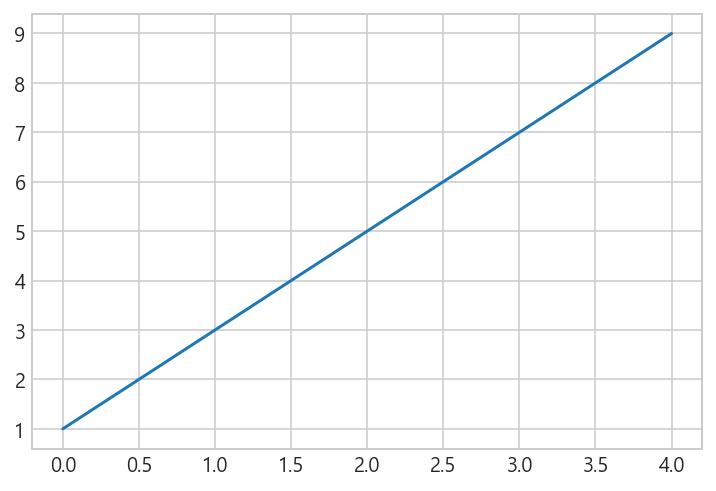

In [4]:
# 그래프 그려보기

pd.Series([1,3,5,7,9]).plot()

<AxesSubplot:title={'center':'한글'}>

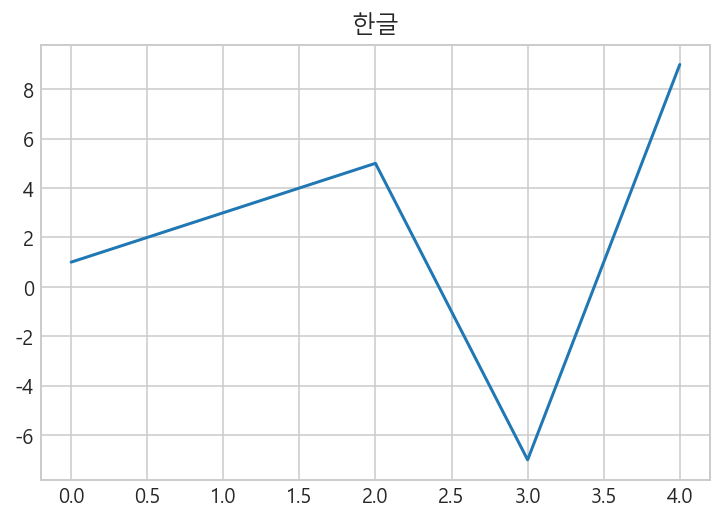

In [5]:
pd.Series([1,3,5,-7,9]).plot(title="한글") # 한글 폰트 잘 그려지는지 알아보기

## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [6]:
%ls data 

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 2E51-2C9C

 C:\Users\djroz\Desktop\ND\2-python\PY_4th\data 디렉터리

2021-11-24  오후 03:41    <DIR>          .
2021-11-24  오후 03:41    <DIR>          ..
2021-11-23  오전 05:38         1,364,502 seoul-covid19-2021-01-03.csv
2021-11-23  오전 05:38         1,408,301 seoul-covid19-2021-05-11.csv
2021-11-23  오전 05:38         3,177,653 seoul-covid19-2021-09-11.csv
2021-11-23  오전 05:34         4,249,158 seoul-covid19-2021-11-22.csv
               4개 파일          10,199,614 바이트
               2개 디렉터리  28,165,406,720 바이트 남음


In [7]:
# seoul-covid19-2021-01-03.csv 불러오기! 하나씩 불러와보자.
# df_01 변수에 담아 재사용합니다.
# df_01

df_01 = pd.read_csv("data/seoul-covid19-2021-01-03.csv")
df_01.shape

(20000, 7)

In [8]:
# csv 불러오기
# df_02 변수에 담아 재사용합니다.
# df_02

df_02 = pd.read_csv("data/seoul-covid19-2021-05-11.csv")
df_02.shape

# 회사 가도 로그데이터(임시성이 있는 데이터)들은 이렇게 날짜별로 끊어서 저장되어있을 때가 있다.

(20000, 7)

In [9]:
df_03 = pd.read_csv("data/seoul-covid19-2021-09-11.csv")
df_04 = pd.read_csv("data/seoul-covid19-2021-11-22.csv")
df_01.shape, df_02.shape, df_03.shape, df_04.shape

((20000, 7), (20000, 7), (46462, 7), (62913, 7))

## head, tail, sample 로 일부 데이터만 보기

In [10]:
# 일부데이터만 가져와보기
df_01.head()

# 연번은 서울시 연번, 환자 번호는 전국에서의 번호이다.

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [11]:
# 일부데이터만 가져와보기
df_02.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
19995,39996,128410,2021-05-11,노원구,-,감염경로 조사중,퇴원
19996,39997,128478,2021-05-11,양천구,-,감염경로 조사중,퇴원
19997,39998,128724,2021-05-11,강남구,-,기타 확진자 접촉,퇴원
19998,39999,128347,2021-05-11,강북구,-,기타 확진자 접촉,퇴원
19999,40000,128576,2021-05-11,양천구,-,양천구 소재 직장 관련('21.5.),퇴원


회사에서 뭐 분석해주세요 했을때, 이렇게 나누어서 주면 직접 합쳐서 써야 한다. 회사는 하나에 넣는게 부담이니까.

In [12]:
# 일부데이터만 가져와보기
df_03.sample(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
14179,72283,228570,2021-08-17,강남구,-,감염경로 조사중,퇴원
42572,43890,140111,2021-05-30,강동구,-,감염경로 조사중,퇴원
9754,76708,242867,2021-08-25,영등포구,-,서초구 소재 직장 관련('21.8),퇴원
24777,61685,189384,2021-07-25,중구,-,감염경로 조사중,퇴원
39968,46494,148108,2021-06-13,강남구,-,기타 확진자 접촉,퇴원
21529,64933,200557,2021-08-01,관악구,-,관악구 소재 요양시설 관련,사망
38318,48144,152366,2021-06-22,강남구,-,기타 확진자 접촉,퇴원
38771,47691,151125,2021-06-19,강동구,-,기타 확진자 접촉,퇴원
44568,41894,134075,2021-05-19,영등포구,-,감염경로 조사중,퇴원
15845,70617,220647,2021-08-13,마포구,-,수도권 소재 실내체육시설 관련,퇴원


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

컬럼이 같고 기간 데이터만 다르다, 전체 기간을 보고싶다, 하면 하나로 합치게 될때 이때 axis = 0은 위아래로, axis = 1은 가로로.

JOIN을 쓸 경우 똑같은 컬럼값이 있는데 이름이 다를때 JOIN으로 합쳐줄 수 있다.

In [13]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
# df

df_all = pd.concat([df_01, df_02, df_03, df_04])
df_all.shape

# 콘캣은 함수이다. 그리고 한번에 여러 값을 넣을 것이기 때문에 리스트의 형태로 넣었다.
# axis 는 기본값이 0이라 세로로 합쳐졌다.
# 149375, 7! 갯수가 같은지 확인하세요!
# 만약 다른 컬럼이 있으면, 다른 컬럼이 없는 곳에는 결측치로 들어가게 된다.
# 퇴원현황에 결측치는 아마도... 치료중이 있음.

(149375, 7)

In [14]:
# axis =1 이게 되면 그냥 옆으로 쭉 붙게 된다.

## 합친 데이터 확인하기

In [15]:
# head, tail, sample 을 통해 데이터 확인하기
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [16]:
df_all.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
62908,80005,252109,2021-08-31,서초구,-,기타 확진자 접촉,NaN
62909,80004,252107,2021-08-31,서초구,-,기타 확진자 접촉,퇴원
62910,80003,252106,2021-08-31,서초구,-,기타 확진자 접촉,퇴원
62911,80002,252861,2021-08-31,타시도,-,감염경로 조사중,퇴원
62912,80001,253226,2021-08-31,관악구,-,기타 확진자 접촉,퇴원


In [17]:
df_all.shape

(149375, 7)

## 중복 제거하기

In [18]:
df_all.sample(20).sort_values('연번')

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
19328,672,10880,2020-05-10,양천구,-,이태원 클럽 관련,퇴원
4855,15145,50724,2020-12-21,중구,-,기타 확진자 접촉,퇴원
247,20248,64690,2021-01-04,강남구,-,기타 확진자 접촉,퇴원
11847,31848,102466,2021-03-29,종로구,-,기타 확진자 접촉,퇴원
44975,41487,133032,2021-05-18,강서구,-,구로구 지인모임 관련,퇴원
36269,50193,157180,2021-06-30,노원구,-,기타 확진자 접촉,퇴원
31922,54540,167839,2021-07-10,영등포구,-,기타 확진자 접촉,퇴원
22689,63773,196283,2021-07-29,은평구,-,기타 확진자 접촉,퇴원
18255,68207,212430,2021-08-08,송파구,-,타시도 확진자 접촉,퇴원
16093,70369,220749,2021-08-13,강동구,-,기타 확진자 접촉,퇴원


In [19]:
df_all[df_all.duplicated('연번', keep=False)].sort_values('연번')

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
6461,80001,251550,2021-08-31,중구,-,감염경로 조사중,퇴원
62912,80001,253226,2021-08-31,관악구,-,기타 확진자 접촉,퇴원
62911,80002,252861,2021-08-31,타시도,-,감염경로 조사중,퇴원
6460,80002,253226,2021-08-31,관악구,-,기타 확진자 접촉,NaN
6459,80003,252861,2021-08-31,타시도,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
56453,86460,272107,2021-09-11,타시도,-,감염경로 조사중,NaN
1,86461,272107,2021-09-11,타시도,-,감염경로 조사중,NaN
56452,86461,272906,2021-09-11,강동구,-,감염경로 조사중,NaN
56451,86462,273536,2021-09-12,중랑구,-,감염경로 조사중,퇴원


In [20]:
# df[df.duplicated(keep=False)].sort_values('연번') 이름 지정해줬으니 안씀.

In [21]:
df = df_all.drop_duplicates('연번', keep = 'last').sort_values('연번', ascending=False) 
df.shape

#keep=last 나중에 수집한것은 퇴원이 있고 없고 다를 수 있으니까 나중의 데이터를 쓰겠다고 한 것 때문에 틀려졌다.

(142913, 7)

In [22]:
# df_all.drop_duplicates('연번')

In [23]:
# 앞을 남길건지 뒤를 남길건지 ()안에 할 수 있다.
#df = df_all.drop_duplicates('연번')

In [24]:
#df = df_all.drop_duplicates('연번').sort_values('연번', ascending=False)
#df.shape

In [25]:
#df00 = df[df.duplicated(['연번','환자'], keep=False)].sort_values('연번', ascending=False)  
# 어센딩 큰것부터 작은거로...
#df00.shape
# ???????

이상해. 잠시 여기 아래는 승아님 필기 가져옴

## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [26]:
# shape
df.shape

(142913, 7)

In [27]:
# 연번의 nunique()
df['연번'].nunique()

142913

In [28]:
# set_index 를 통해 인덱스 값을 변경합니다.
df = df.set_index('연번')
# 이것 두번 실행하면 오류나요 이미 인덱스 로 바꿔줬기 때문에 연번이라는 컬럼이 없다.

## 연번 순으로 정렬하기

In [29]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원


In [30]:
# head 로 미리보기 합니다.
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN


In [31]:
# tail로 미리보기 합니다.
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
1,2,2020-01-24,강서구,중국,해외유입,퇴원


## 판다스의 attributes
* [Series — pandas documentation](https://pandas.pydata.org/docs/reference/series.html#attributes)
* [DataFrame — pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)

괄호가 안들어간다. 판다스 API의 약속이다. 위 링크에 들어가면 시리즈와 데이터프레임에 따라서 다르다.

메소드가 아닌것들은 괄호가 안들어간다.

외우기 어렵고 외울 생각도 않는다. 연습 많이 하고, 치트슅 보는것에 익숙해지자.


In [32]:
# shape
df.shape

(142913, 6)

In [33]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [34]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [35]:
# index
df.index

Int64Index([142913, 142912, 142911, 142910, 142909, 142908, 142907, 142906,
            142905, 142904,
            ...
                10,      9,      8,      7,      6,      5,      4,      3,
                 2,      1],
           dtype='int64', name='연번', length=142913)

## 데이터 요약

In [36]:
# info를 통해 데이터를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142913 entries, 142913 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   환자      142913 non-null  int64 
 1   확진일     142913 non-null  object
 2   거주지     142913 non-null  object
 3   여행력     142913 non-null  object
 4   접촉력     142913 non-null  object
 5   퇴원현황    115750 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.6+ MB


퇴원 현황이 비어있는 것이 많다. 정말 안했거나 수집되는 동안 서버에 잠깐 장애가 일어나서 누락이 되었다던가, 여러 사유에 의해 결측치가 발생할 수 있다. 비어있는 컬럼일 때에는...? 

## 결측치 보기

In [37]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    27163
dtype: int64

In [38]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean() * 100

환자       0.000000
확진일      0.000000
거주지      0.000000
여행력      0.000000
접촉력      0.000000
퇴원현황    19.006668
dtype: float64

In [39]:
df['퇴원현황'].value_counts()

퇴원    114801
사망       949
Name: 퇴원현황, dtype: int64

## 기술통계

In [40]:
# describe()로 기술통계 값을 구합니다.
df.describe()

,환자
count,142913.000000
mean,221185.693681
std,122665.615932
min,2.000000
25%,114987.000000
50%,224530.000000
75%,330388.000000
max,420950.000000


In [41]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include='object')
#만약 같을 때는 랜덤으로 나온다 거주지 송파 혹은 강남. 다를 때 아래를 본다.

,확진일,거주지,여행력,접촉력,퇴원현황
count,142913,142913,142913,142913,115750
unique,637,31,176,1286,2
top,2021-11-16,송파구,-,기타 확진자 접촉,퇴원
freq,1436,8791,140948,57235,114801


In [42]:
df['거주지'].value_counts().head(10) 

송파구     8791
강남구     8791
관악구     7487
구로구     7143
타시도     7137
영등포구    6884
강서구     6377
은평구     6021
성북구     5906
강동구     5899
Name: 거주지, dtype: int64

## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [39]:
# 확진일 Series 형태로 가져오기
df["확진일"].tail(1)

19999    2020-01-24
Name: 확진일, dtype: object

In [43]:
# pd.to_datetime 을 통한 데이터 타입 변경하기
# 비슷한 기능인 implace는 덮어쓰게 되는 기능이지만,
# 메소드 체이닝을 하게되면 임플레이스가 작동하지 않아서 이 기능을 없앨 예정이라고.
df['확진일'] = pd.to_datetime(df['확진일'])

In [44]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df['확진일'].head(2)

연번
142913   2021-11-22
142912   2021-11-22
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

df[컬럼]=df[컬럼].dt.어쩌구

In [45]:
# 연도 파생변수 만들기
# df["연도"]

df['연도'] = df['확진일'].dt.year

In [47]:
# 월(month), 일(day), 요일(dayofweek) 만들기
# df["월"]
# df["일"]
# df["요일"]

df['월'] = df['확진일'].dt.month
df['일'] = df['확진일'].dt.day
df['요일'] = df['확진일'].dt.dayofweek

In [48]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기

df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN,2021,11,22,0
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN,2021,11,22,0
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0


월이나 요일등으로 쪼개서 보기 위해 이렇게 만듭니다.

월별로 빈도수를 구하게 되면 작년만 있기 때문에 연도와 월을 붙여 만듭시다.

### 연도-월 만들기

In [49]:
# 연도-월 파생변수 만들기 1 - 추천방법
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
# df["연도월"]

df['확진일'].astype(str).str[:7]

연번
142913    2021-11
142912    2021-11
142911    2021-11
142910    2021-11
142909    2021-11
           ...   
5         2020-01
4         2020-01
3         2020-01
2         2020-01
1         2020-01
Name: 확진일, Length: 142913, dtype: object

In [50]:
# 연도-월 파생변수 만들기 2
# 문자열 슬라이싱으로도 만들 수 있습니다.
# df["연도월"]

df["연도"].astype(str) + "-" + df["월"].astype(str)

연번
142913    2021-11
142912    2021-11
142911    2021-11
142910    2021-11
142909    2021-11
           ...   
5          2020-1
4          2020-1
3          2020-1
2          2020-1
1          2020-1
Length: 142913, dtype: object

In [51]:
# df["연도월"]에 넣고, 잘 생성되었는지 확인하기

df["연도월"] = df["확진일"].astype(str).str[:7]
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11


### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [52]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [53]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수
#dayofweek으로 했을 때 월요일이 인덱스 0이라는 것을 이용하자.
#그럼 함수 명명할 때에도 0에 월요일부터 들어가도록 해주면 된다! 

# def find_dayofweek(day_no):

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]

In [54]:
# 함수가 잘 만들어졌는지 확인하기

find_dayofweek(0), find_dayofweek(3)

('월', '목')

In [55]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
# df["요일명"]

# 시리즈(컬럼 하나)에 쓸 땐 map을 그냥 쓰면 됩니다.

df["요일명"] = df["요일"].map(find_dayofweek)

In [56]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
# 컬럼 둘이니까 시리즈로 묶어주는거 까먹지 말자구요.

df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
72723,2,수
97711,0,월
42456,5,토
116155,1,화
132246,6,일


## 전체 수치 변수 히스토그램 그리기

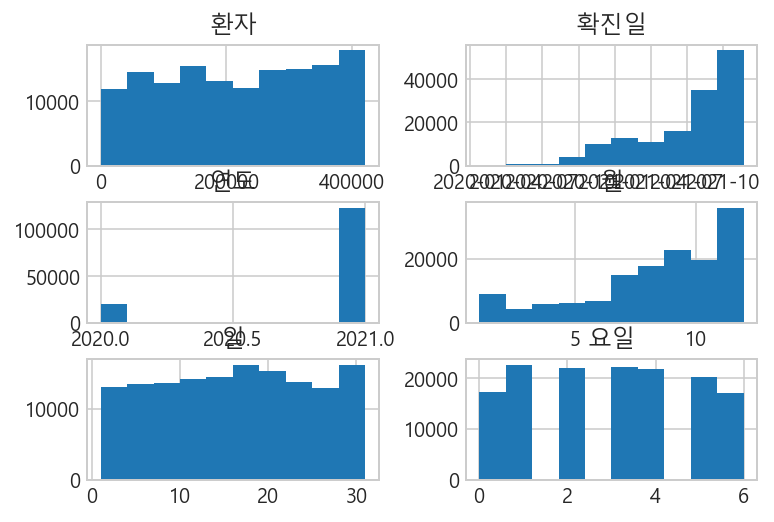

In [57]:
# df.hist로 히스토그램 그리기

_ = df.hist()

시계열 데이터에서 요일은 웬만하면 의미를 갖는 경우가 많다. 

주말에는 검사수가 적어서 월요일 같은 때 적은 것이 실제로 보인다

**여기서 질문.... 아 표 이름 바꾸고 싶어요.**

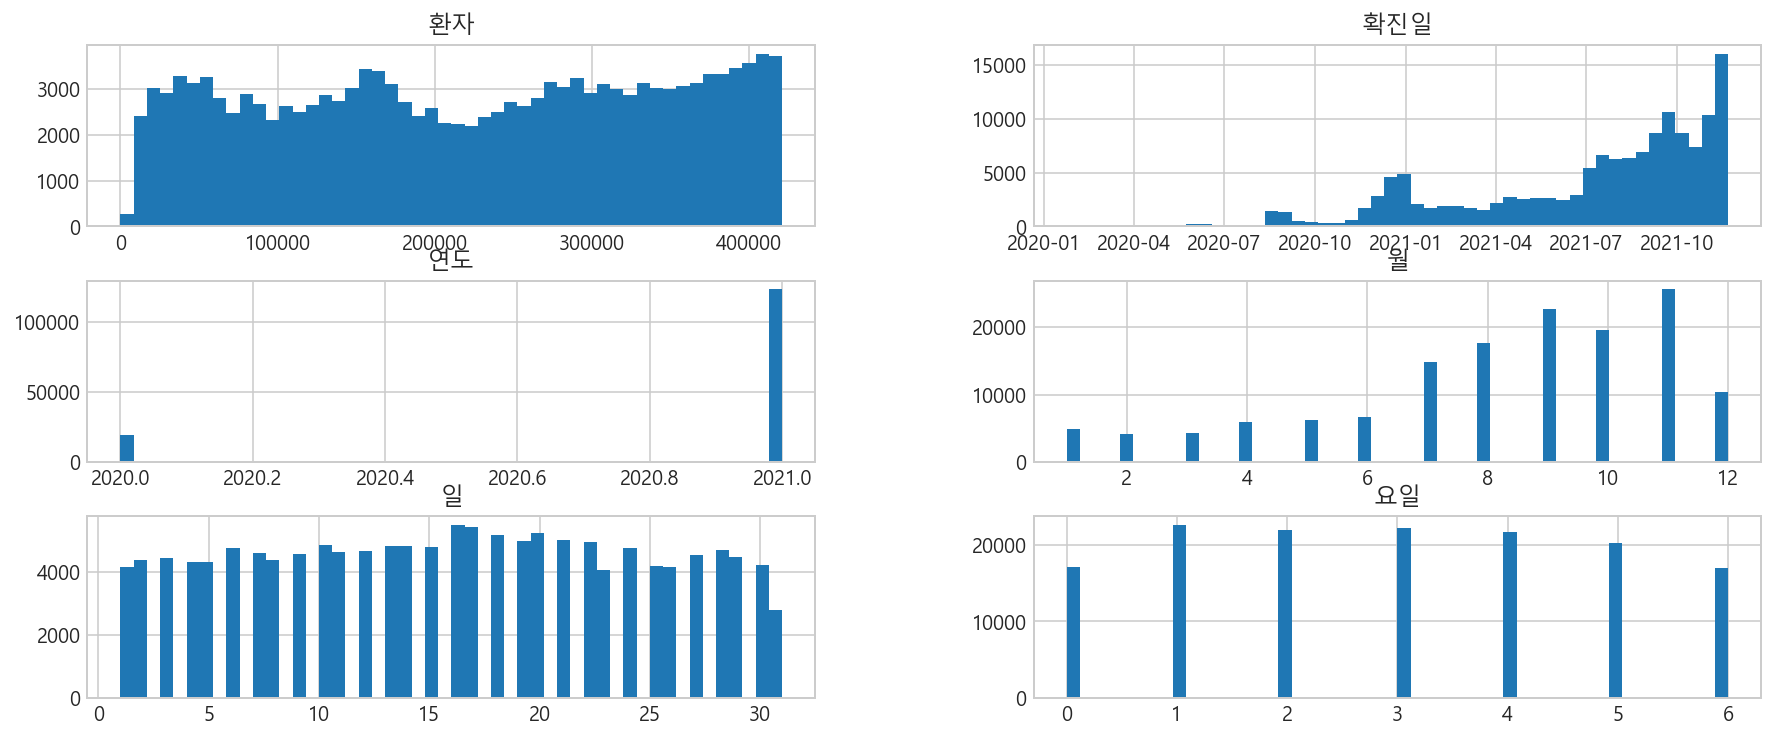

In [60]:
# 히스토그램 크기와 막대갯수(구간나눌갯수) 조정하기

_ = df.hist(figsize=(15,6), bins=50)

## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [61]:
# "연도" 컬럼을 통해 빈도수 구하기
df["연도"].value_counts()

2021    123521
2020     19392
Name: 연도, dtype: int64

In [64]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize=True)

2021    0.864309
2020    0.135691
Name: 연도, dtype: float64

In [70]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize=True) * 100 

2021    86.430906
2020    13.569094
Name: 연도, dtype: float64

### 연도월

In [72]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index() 로 정렬합니다. sort_index 해도 나오긴 나오네
# year_month

year_month = df["연도월"].value_counts().sort_index()

<AxesSubplot:>

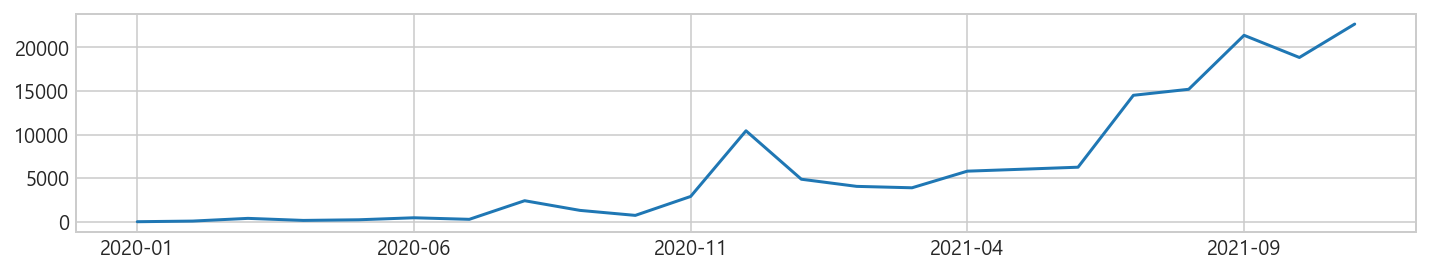

In [74]:
# 연도월을 시각화 합니다.
year_month.plot(figsize=(12,2))

<AxesSubplot:>

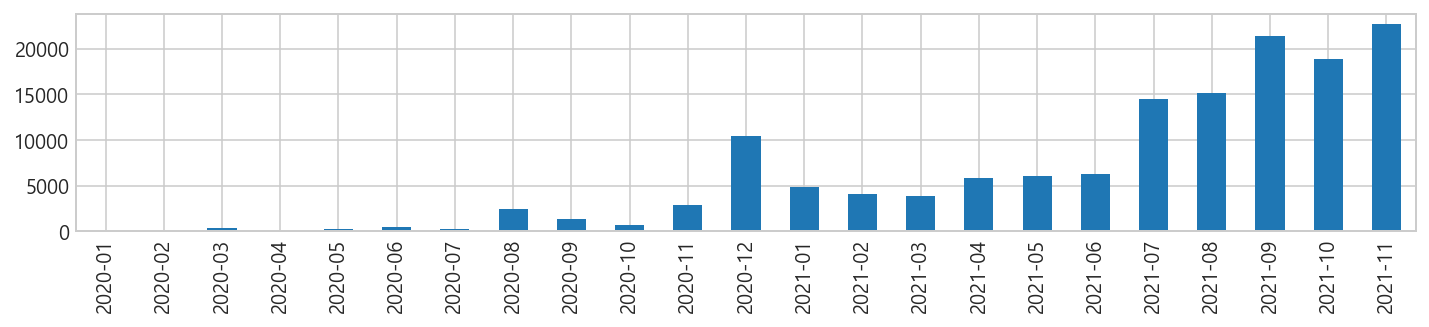

In [75]:
# 연도월을 막대 그래프로 시각화 합니다.
year_month.plot.bar(figsize=(12,2))

#figsize 하고 이퀄 쓰는 것 작작 빠뜨리세요.

10월에 좀 줄어든것 같이 보이는데, 결측치가 있지 않을까 생각을 하신다고.

위에 것은 생략이 되어 나온다. 그래서 두 그래프가 크다.

막대그래프는 범주형 데이터를 보는데 적합, 선그래프는 연속된 수치형 데이터를 보는데 적합하다.

선그래프는 그래서 임의로 그려지는 부분도 있게 되는 것이지.

### 요일별 빈도수 구하기

In [76]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
# weekday_count

weekday_count = df["요일"].value_counts().sort_index()
weekday_count

#요일에 인덱스번호가 매겨졌조. 그것을 각 요일별로 몇개 있는지 세어보았어요.

0    17149
1    22643
2    21963
3    22218
4    21737
5    20224
6    16979
Name: 요일, dtype: int64

In [77]:
# 리스트컴프리헨션 사용해서 '간단하게!' 리스트 만들기
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
# weekday_list

weekday_list = [w for w in '월화수목금토일']
weekday_list

#리스트를 만들었어요. 순서대로 하나씩 나오도록 하는 리스트에요. 굉장히 편하고, 한 번 쓰면 계속 쓰게 될 거에요.

['월', '화', '수', '목', '금', '토', '일']

In [79]:
#그럼 이제 그 리스트를 인덱스로 넣어주어요.

weekday_count.index = weekday_list
weekday_count

월    17149
화    22643
수    21963
목    22218
금    21737
토    20224
일    16979
Name: 요일, dtype: int64

In [81]:
# 만약 직접 했어야 한다면
#weekday_list = []
#for w in '월화수목금토일':
#    weekday_list.append(w)

#weekday_list

<AxesSubplot:>

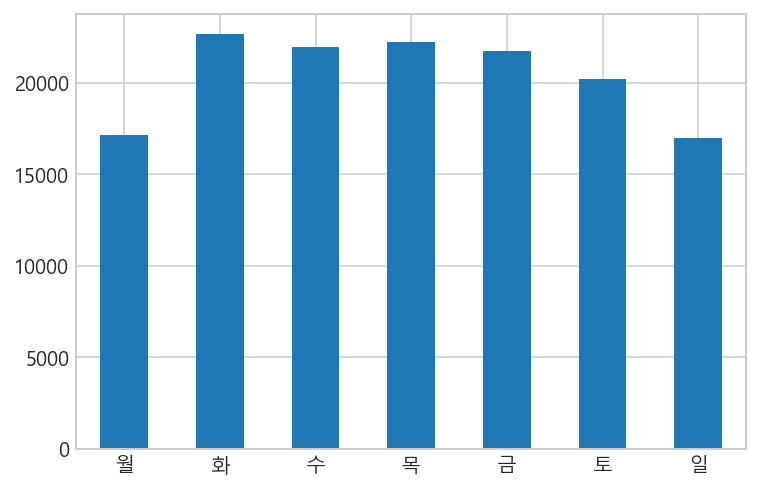

In [82]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
# weekday_count.index
weekday_count.index = weekday_list
weekday_count.plot.bar(rot=0)

### 확진일 빈도수 구하기

In [ ]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
# day_count

In [ ]:
# 선 그래프로 시각화 하기


## 전체 확진일 데이터 만들기
### tail로 초기 데이터 보기

In [ ]:
# head(10)로 10번째 확진 데이터를 봅니다.


### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [ ]:
# last_day

In [ ]:
# first_day

### date_range로 전체 기간 데이터 만들기

In [ ]:
# pd.date_range 로 전체 기간을 생성합니다.
# all_day

In [ ]:
# all_day 를 데이터프레임으로 변환합니다.


In [ ]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.


In [ ]:
# 필요 없는 0 컬럼을 삭제합니다.
# del df_all_day[0]

### 결측치 채우기

In [ ]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.


In [ ]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.


### 누적 확진 수 구하기

In [ ]:
# df

In [ ]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
# df_all_day["누적확진수"]


In [ ]:
# 시각화 하기


## 거주지

In [ ]:
# 거주지 빈도수 구하기


### 타시도, 기타 전처리

In [ ]:
# "거주지" => "거주구"로 사본 생성
# df["거주구"]

In [ ]:
# 텍스트 앞뒤 공백 제거하기


In [ ]:
# 타시도 => 기타로 변경하기


In [ ]:
# "거주구" 빈도수 구하기


In [ ]:
# gu_count 변수에 담긴 값 시각화 하기


## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기


In [ ]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기


### 연도, 월 두 개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기


In [ ]:
# 시각화 하기


### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기


In [ ]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# weekday_list


In [ ]:
# 컬럼명 변경하기


### 거주구, 연도월에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기


In [ ]:
# background_gradient() 로 빈도수 표현하기


In [ ]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기
# background_gradient()


## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [ ]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]


In [ ]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기


### str.contains 활용하기

In [ ]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기


In [ ]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기


### isin 으로 여러 값 찾기

In [ ]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기


## 여행력

In [ ]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기


In [ ]:
# 거주구, 해외유입 빈도수 구하기


In [ ]:
# 거주구 해외유입 비율 구하기


In [ ]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.


## pivot_table 사용하기

In [ ]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count


In [ ]:
weekday_list

In [ ]:
# 거주구에 따른 요일별 확진자 빈도수
# df_gu_weekday[weekday_list].style.bar()

## groupby 사용하기

In [ ]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기


### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [ ]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기


In [ ]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기


In [ ]:
# unstack()으로 월을 컬럼으로 만들기


In [ ]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기
